In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('rfm_revised.csv',index_col=['Unnamed: 0'])
df.head()

Customer ID   last_date  recency  rank_recency  frequency  freq_ranking  \
0      12346.0  2011-01-18      325      0.710338         34      0.621068   
1      12347.0  2011-12-07        2      0.031202        222      0.153715   
2      12348.0  2011-09-25       75      0.458085         51      0.505951   
3      12349.0  2011-11-21       18      0.192229        175      0.197585   
4      12350.0  2011-02-02      310      0.699286         17      0.790342   

      monetary  rank_monet  rec_freq_monet  
0  6463.038333    0.001530             321  
1   615.191250    0.106104             111  
2   403.880000    0.263051             221  
3  1107.172500    0.028567             111  
4   334.400000    0.375446             231

In [4]:
df.columns


Index(['Customer ID', 'last_date', 'recency', 'rank_recency', 'frequency',
       'freq_ranking', 'monetary', 'rank_monet', 'rec_freq_monet'],
      dtype='object')

In [7]:
x=df[['recency','frequency','monetary']]

In [8]:
x

recency  frequency     monetary
0         325         34  6463.038333
1           2        222   615.191250
2          75         51   403.880000
3          18        175  1107.172500
4         310         17   334.400000
...       ...        ...          ...
5876        3        938   121.131818
5877      431         28   461.680000
5878      660         12   427.000000
5879      476         67   648.215000
5880       42        155   597.570000

[5881 rows x 3 columns]

In [9]:
km=KMeans(n_clusters=3,n_init=10,max_iter=300,tol=0.0001)

In [15]:
fitting=km.fit_predict(x)

In [17]:
fitting

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
x['centroids']=fitting

C:\Users\PS001028870\AppData\Local\Temp\ipykernel_18744\1863919091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['centroids']=fitting


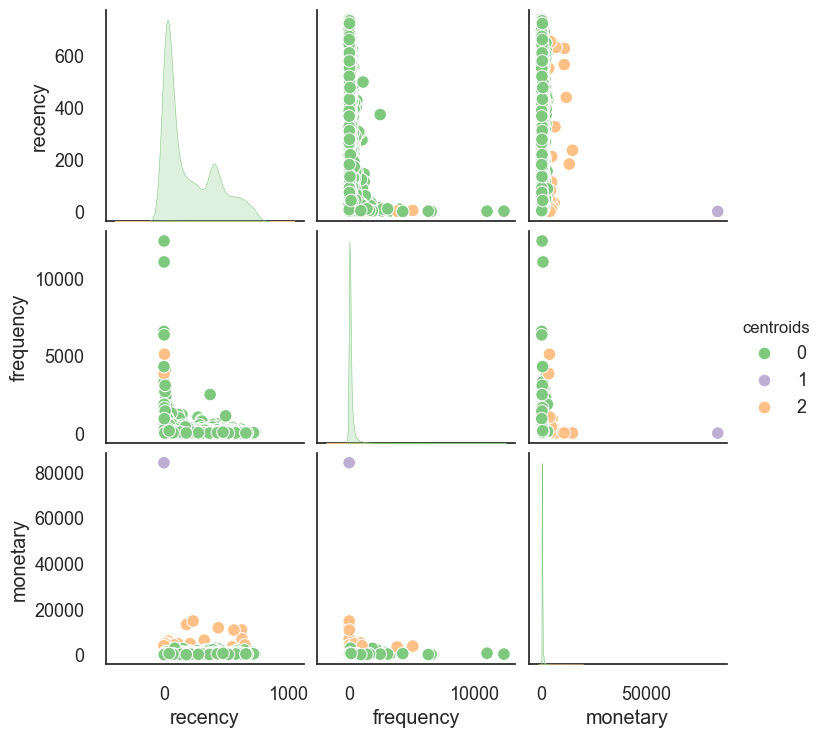

In [53]:
plt.style.use('seaborn-v0_8-ticks')
sns.pairplot(data=x,hue='centroids',palette='Accent')
plt.show()

In [51]:
# plt.style.available

In [56]:
sses=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,n_init=10,max_iter=300,tol=0.0001)
    fitting=km.fit(x)
    sses.append(fitting.inertia_)

In [57]:
sses

[9612311021.280592,
 2580021904.6090503,
 1708732491.2442107,
 1365077901.2794902,
 1043699622.7121874,
 814988862.8707838,
 627093850.9953269,
 491853405.342406,
 419259006.3330308,
 349117589.080837]

<Axes: >

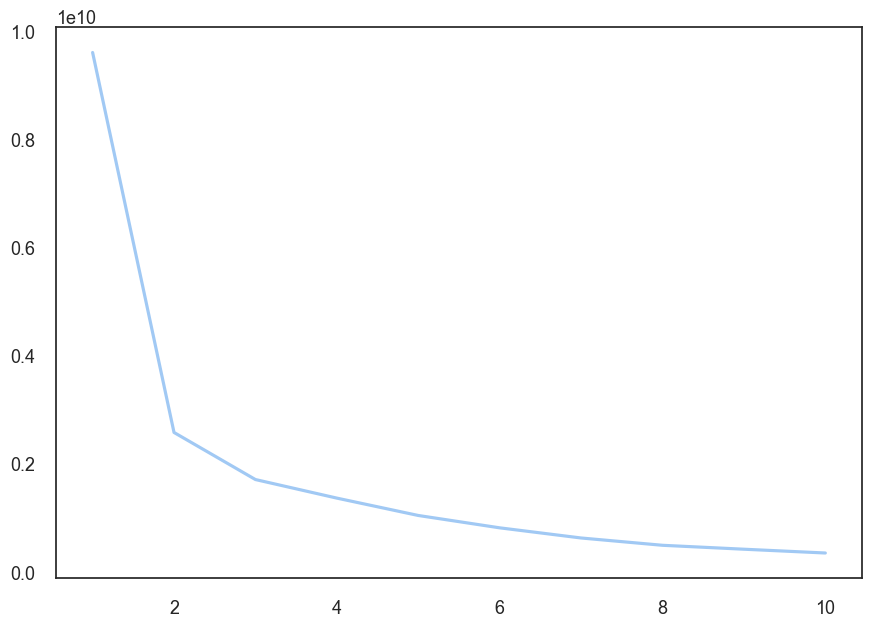

In [58]:
sns.lineplot(x=[i for i in range(1,11)],y=sses)